In [1]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Tut 1: Question 3

In [2]:
def rate(Fa, Fb, Fc, P):
   
    Ft = Fa + Fb + Fc
    ra = -k*(Fb/Ft)*P
    return ra

In [3]:
def PBR(var, W):
    Fa = var[0]
    Fb = var[1]
    Fc = var[2]
    
    ra = rate(Fa, Fb, Fc, Po)
    rb = 2*ra
    rc = -ra
    
    dFadW = ra
    dFbdW = rb
    dFcdW = rc
    
    return [dFadW, dFbdW, dFcdW]

In [4]:
k = 0.05 #molA/kgminatmb
Fto = 40 #mol/min
Fao = 13.2 #mol/min
Fbo = 26.8 #mol/min
Fco = 0 #mol/min
Po = 5 #atm
R = 8.314 #j/molK
T = 170+273.15 #K
Qo = (Fto*R*T)/Po #m3
varo = [Fao, Fbo, Fco]

W1 = 44.3
Wspan1 = linspace(0, W1, 1000)
F = odeint(PBR, varo, Wspan1)
Fa, Fb, Fc = F.T
Ft = Fa+Fb+Fc
Q = (Ft/Fto)*Qo
x = (Fao-Fa[-1])/Fao
x

0.4999234564703841

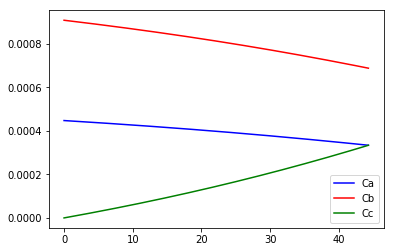

In [5]:
Ca = Fa/Q
Cb = Fb/Q
Cc = Fc/Q

plt.plot(Wspan1, Ca, color='blue', label='Ca')
plt.plot(Wspan1, Cb, color='red', label='Cb')
plt.plot(Wspan1, Cc, color='green', label='Cc')
plt.legend(loc='best')
plt.show()

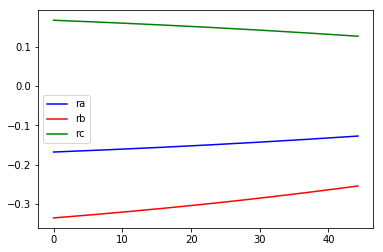

In [6]:
ra = rate(Fa, Fb, Fc, Po)
rb = 2*ra
rc = -ra

plt.plot(Wspan1, ra, color='blue', label='ra')
plt.plot(Wspan1, rb, color='red', label='rb')
plt.plot(Wspan1, rc, color='green', label='rc')
plt.legend(loc='best')
plt.show()

In [7]:
Mo_avg = 30
e = 0.4
D = 0.085 #m
dp = 3e-3 #m
u = 2e-5 #kg/ms
rhoB = 1000 #kg/m3
A = (pi/4)*D**2
A

0.005674501730546565

In [8]:
def PBR1(var, W):
    Fa = var[0]
    Fb = var[1]
    Fc = var[2]
    P = var[3]
    
    ra = rate(Fa, Fb, Fc, P)
    rb = 2*ra
    rc = -ra
    
    Ft = Fa+Fb+Fc
        
    dFadW = ra
    dFbdW = rb
    dFcdW = rc    
    dPdW = -K*(Ft/Fto)*(Po/P)*(1/1000)*(1/101.325)
        
    return [dFadW, dFbdW, dFcdW, dPdW]

In [9]:
k = 0.05 #molA/kgminatmb
Fto = 40 #mol/min
Fao = 13.2 #mol/min
Fbo = 26.8 #mol/min
Fco = 0 #mol/min
Po = 5 #atm
Pi = 5*101.325
R = 8.314 #j/molK
T = 170+273.15 #K
Qo = (Fto*R*T)/Pi #m3
K = 3184.4 #Pa/kg
i = [Fao, Fbo, Fco, Po]

W2 = 53 #kg
Wspan2 = linspace(0, W2, 1000)
F = odeint(PBR1, i, Wspan2)
Fa, Fb, Fc, P = F.T
Ft = Fa+Fb+Fc
Q = (Ft/Fto)*Qo
x = (Fao-Fa[-1])/Fao
x

0.5006189499574337

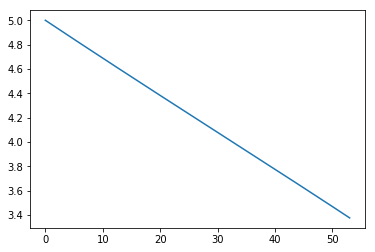

In [10]:
plt.plot(Wspan2, P)

In [11]:
P[-1]

3.3759220764073175

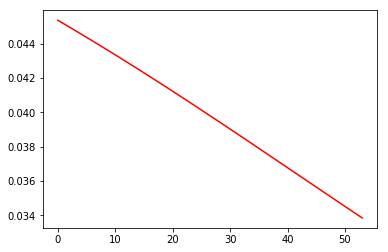

In [12]:
Ca = Fa/Q
plt.plot(Wspan2, Ca, 'r')

# Tut 1: Question 4

In [13]:
def rate(Fa, Fb, P):
   
    Ft = Fa + Fb
    Q = (Ft/Fto)*Qo
    #Q = (P/Po)*Qo
    ra = -k*(Fa/Q)**2
    return ra

In [14]:
def PBR2(val, W):
    Fa = val[0]
    Fb = val[1]
    P = val[2]
       
    ra = rate(Fa, Fb, P)
    rb = -0.5*ra
    
    Ft = Fa+Fb
        
    dFadW = ra
    dFbdW = rb    
    dPdW = -K*(Ft/Fto)*(Po/P)*(1/1000)
    #print(P)    
    return [dFadW, dFbdW, dPdW]

In [22]:
Fao = 1 
Fbo = 0
Qo = 1
W = 4
Po = 20*101.325 #Kpa
Pe = 5*101.325 #Kpa
Fae = 0.7

K = 10346800 #Pa/kg 
#K = 10999999
#K = 13800000
k = 0.000058
#k = 0.00044

w = linspace(0, W, 100)
Varo = [Fao, Fbo, Po]
Var = odeint(PBR2, Varo, w)
Fa, Fb, P = Var.T

P[-1]/101.325, Fa[-1], Fb[-1], (Fao-Fa[-1])/Fao

(5.000043730965486,
 0.6927741824345949,
 0.15361290878270253,
 0.3072258175654051)

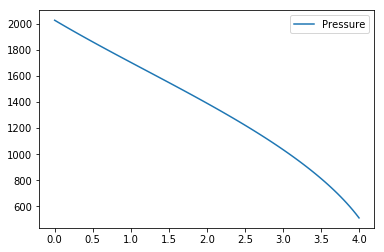

In [16]:
plt.plot(w, P, label='Pressure')
plt.legend(loc='best')

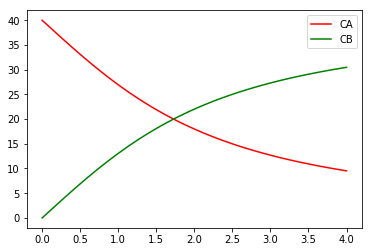

In [17]:
Ft = Fa+Fb
Q = (Ft/Fto)*Qo
Cb = Fb/Q
Ca=Fa/Q
plt.plot(w, Ca,'r', label='CA')
plt.plot(w, Cb, 'g', label='CB')
plt.legend(loc='best')

In [18]:
from scipy.optimize import fsolve
def r(Ca):
    return -kdash*Ca**2

def cstr(v):
    Fa = v[0]
    Fb = v[1]
    Ft = Fa + Fb
    Q = (Ft/Fto)*Qo
    
    Ca = Fa/Q
    ra = r(Ca)
    rb = -0.5*ra
    
    e1 = Fao - Fa + ra*W
    e2 = Fbo - Fb + rb*W
    
    return [e1, e2]

Fa = []
Fb = []
kdash = 0.00044
#W = linspace(0, 1, 10)
W = 1
F = fsolve(cstr, [1, 0])
fa, fb = F[0], F[1]
Fa.append(fa)
Fb.append(fb)
    
Fa
x = (1 - Fa[-1])/1
x
    

0.3978079916838416